In [39]:
import csv
from sklearn.metrics import confusion_matrix
import seaborn
from sklearn.metrics import f1_score
import plotly.plotly as py
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import plotly.graph_objs as go


In [49]:
sentiment_classifier=[]
our_results=[]
with open('ground_truth_sentimentAnalysis_testdataset.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        sentiment_classifier.append(row['sentiment analysis'])
        our_results.append(row['sophia'])
     

In [50]:
cm=confusion_matrix(our_results, sentiment_classifier, labels=["positive", "neutral", "negative"])
header=["positive", "neutral", "negative"]

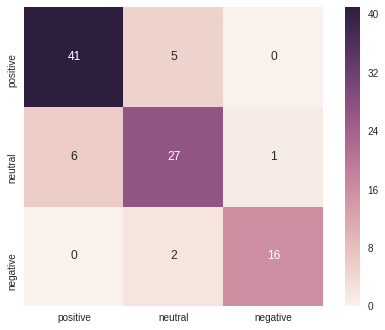

In [51]:
hm = seaborn.heatmap(cm,cbar=True, annot=True, square=True, yticklabels=header,xticklabels=header)
plt.show()

In [52]:
f1_=f1_score(our_results, sentiment_classifier, average='macro') 
prec= precision_score(our_results, sentiment_classifier, average='macro')  
rec= recall_score(our_results, sentiment_classifier, average='macro') 
print "F1_score", f1_
print "Precision:", prec
print "Recall:", rec

F1_score 0.6400130761686826
Precision: 0.6373349339735894
Recall: 0.6435777209434498


/home/mscuser/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples.



In [53]:
def compute_class_rec_pre_f1(c_mat):
    '''
    :param c_mat: the [n_class x n_class] confusion matrix
    :return: rec, pre and f1 for each class
    '''
    n_class = c_mat.shape[0]
    rec, pre, f1 = [], [], []
    for i in range(n_class):
        if np.sum(c_mat[i, :])==0:
            rec.append(0)
        else:
            rec.append(float(c_mat[i, i]) / np.sum(c_mat[i, :]))
        if np.sum(c_mat[:, i])==0:
            pre.append(0)
        else:
            pre.append(float(c_mat[i, i]) / np.sum(c_mat[:, i]))
        if(rec[-1] + pre[-1])==0:
            f1.append(0)        
        else:
            f1.append(2 * rec[-1] * pre[-1] / (rec[-1] + pre[-1]))
    return rec,  pre, f1

In [54]:
import numpy as np
import plotly
import plotly.graph_objs as go
class_names=["positive", "neutral", "negative"]
heatmap = go.Heatmap(z=np.flip(cm, axis=0), x=class_names,y=list(reversed(class_names)),colorscale=[[0, '#4422ff'], [1, '#ff4422']],name="confusin matrix", showscale=False)
rec, pre, f1 = compute_class_rec_pre_f1(cm)
mark_prop1 = dict(color='rgba(150, 180, 80, 0.5)',line=dict(color='rgba(150, 180, 80, 1)', width=2))
mark_prop2 = dict(color='rgba(140, 200, 120, 0.5)', line=dict(color='rgba(140, 200, 120, 1)', width=2))
mark_prop3 = dict(color='rgba(50, 150, 220, 0.5)', line=dict(color='rgba(50, 150, 220, 1)', width=3))
b1 = go.Bar(x=class_names,  y=rec, name="rec", marker=mark_prop1)
b2 = go.Bar(x=class_names,  y=pre, name="pre", marker=mark_prop2)
b3 = go.Bar(x=class_names,  y=f1, name="f1", marker=mark_prop3)
figs = plotly.tools.make_subplots(rows=1, cols=2,subplot_titles=["Confusion matrix", "Performance measures"])
figs.append_trace(heatmap, 1, 1); figs.append_trace(b1, 1, 2)
figs.append_trace(b2, 1, 2); figs.append_trace(b3, 1, 2)
plotly.offline.plot(figs, filename="temp.html", auto_open=True)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



'file:///home/mscuser/multi/multimodal_audio/ground_truth/temp.html'